1.7320556640625
     n        x0        xm        x1     f(x0)     f(xm)     f(x1)
0    1  1.000000  1.500000  2.000000 -2.000000 -0.750000  1.000000
1    2  1.500000  1.500000  2.000000 -0.750000 -0.750000  1.000000
2    3  1.500000  1.750000  1.750000 -0.750000  0.062500  0.062500
3    4  1.625000  1.625000  1.750000 -0.359375 -0.359375  0.062500
4    5  1.687500  1.687500  1.750000 -0.152344 -0.152344  0.062500
5    6  1.718750  1.718750  1.750000 -0.045898 -0.045898  0.062500
6    7  1.718750  1.734375  1.734375 -0.045898  0.008057  0.008057
7    8  1.726562  1.726562  1.734375 -0.018982 -0.018982  0.008057
8    9  1.730469  1.730469  1.734375 -0.005478 -0.005478  0.008057
9   10  1.730469  1.732422  1.732422 -0.005478  0.001286  0.001286
10  11  1.731445  1.731445  1.732422 -0.002097 -0.002097  0.001286
11  12  1.731934  1.731934  1.732422 -0.000406 -0.000406  0.001286
12  13  1.731934  1.732178  1.732178 -0.000406  0.000440  0.000440
13  14  1.731934  1.732056  1.732056 -0.000406

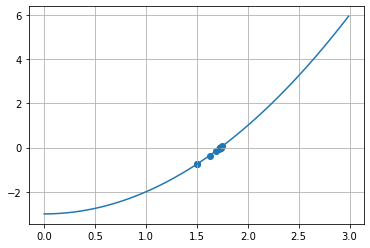

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def func(x):
    return x**2-3

# f(x0) x f(x1) <= 0 
x0 = 1
x1 = 2
tol = 1*10**(-4)
x0_list = []
x0_list.append(x0)
x1_list = []
x1_list.append(x1)
xm_list = []
if -tol < func(x0) < tol:
    x_ans = x0
    print(f'{x_ans}(input)')
elif -tol < func(x1) < tol:
    x_ans = x1
    print(f'{x_ans}(input)')
else:
    xm = (x0+x1)/2
    xm_list.append(xm)
    while -tol > func(xm) or func(xm) > tol:
        xm = (x0+x1)/2
        xm_list.append(xm)
        if func(x0)*func(xm) <= 0:
            x1 = xm
        elif func(x1)*func(xm) <= 0:
            x0 = xm
        else:
            print('Cannot find roots.')
        x0_list.append(x0)
        x1_list.append(x1)
    x_ans = xm
    print(x_ans)
    
    n = np.arange(1,len(x0_list)+1)
    fx0_list = [func(x) for x in x0_list]
    fx1_list = [func(x) for x in x1_list]
    fxm_list = [func(x) for x in xm_list]
    data = {'n':n,'x0':x0_list,'xm':xm_list,'x1':x1_list,
            'f(x0)':fx0_list,'f(xm)':fxm_list,'f(x1)':fx1_list}
    table = pd.DataFrame(data)
    print(table)
    y_list = [func(x) for x in xm_list]
    plt.scatter(xm_list,y_list)
    min_x = min(min(x0_list),min(xm_list),min(x1_list))-1
    max_x = max(max(x0_list),max(xm_list),max(x1_list))+1
    x = np.arange(min_x,max_x,0.01)
    plt.plot(x, [func(x) for x in x])
    plt.grid(True)
    plt.show()